# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna(subset=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'YEAR', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'AVG_READING_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: 4th grade math scores

How many years of data are logged in our dataset? 

In [5]:
df["YEAR"].nunique()

7

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [6]:
MI = df.query("STATE == 'MICHIGAN'")['AVG_MATH_4_SCORE'].mean()
OH = df.query("STATE == 'OHIO'")['AVG_MATH_4_SCORE'].mean()
print("MI:", MI)
print("OH:", OH)

MI: 236.71428571428572
OH: 243.28571428571428


Find the average for your outcome score across all states in 2019

In [7]:
df['AVG_MATH_4_SCORE'].mean()

238.91316526610643

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [8]:
df.groupby('STATE')["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              234.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    231.0
FLORIDA                 243.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             234.0
MISSOURI                241.0
MONTANA                 244.0
NEBRASKA                244.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_MEXICO              233.0
NEW_YORK                243.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>
#created columns to get score per dollar to later compare, and to see what states are above the median. created corellation column to see what states had higher than median improvement. created the & column to see if high improvement correlates with better score per dollar. some created columns are not used and were just for mee to look at. ALL OF THIS WAS MAINLY FOR THE FIRST VISUAL, WHICH DIDN'T EVEN SHOW A CORRELATION, SO...... YEA.

**

In [11]:
df['Related_Expenditure'] = df['INSTRUCTION_EXPENDITURE'] + (df['SUPPORT_SERVICES_EXPENDITURE'])
df['Math_4_to_Math_8_Correlation'] = df['AVG_MATH_8_SCORE'] / df['AVG_MATH_4_SCORE']
df['MATH_8_SCORE_PER_DOLLAR'] = df['AVG_MATH_8_SCORE'] / (df['SUPPORT_SERVICES_EXPENDITURE'] + df['INSTRUCTION_EXPENDITURE'])
df['MATH_4_SCORE_PER_DOLLAR'] = df['AVG_MATH_4_SCORE'] / (df['SUPPORT_SERVICES_EXPENDITURE'] + df['INSTRUCTION_EXPENDITURE'])
df['Below_Related_Expenditure_median'] = df['Related_Expenditure'] <= df['Related_Expenditure'].median()
df['ABOVE_8_MEDIAN'] =  df['MATH_8_SCORE_PER_DOLLAR'] >= df['MATH_8_SCORE_PER_DOLLAR'].median()
df['ABOVE_4_MEDIAN'] =  df['MATH_4_SCORE_PER_DOLLAR'] >= df['MATH_4_SCORE_PER_DOLLAR'].median()
df['above_correlation'] = df['Math_4_to_Math_8_Correlation'] >= df['Math_4_to_Math_8_Correlation'].median()
df['8_per_dollar_>_&_above_8_median'] = df['ABOVE_8_MEDIAN'] * df['above_correlation'] == 1
print(df['MATH_8_SCORE_PER_DOLLAR'].median())
print(df['MATH_4_SCORE_PER_DOLLAR'].median())
print(df['Math_4_to_Math_8_Correlation'].median())
print(df['8_per_dollar_>_&_above_8_median'].value_counts())
df.head(100)

5.0553790501468234e-05
4.330593523244053e-05
1.1764705882352942
8_per_dollar_>_&_above_8_median
False    272
True      85
Name: count, dtype: int64


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,AVG_READING_8_SCORE,Related_Expenditure,MATH_8_SCORE_PER_DOLLAR,MATH_4_SCORE_PER_DOLLAR,Below_Related_Expenditure_median,ABOVE_8_MEDIAN,ABOVE_4_MEDIAN,Math_4_to_Math_8_Correlation,above_correlation,8_per_dollar_>_&_above_8_median
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,253.0,4338573.0,0.000060,0.000051,True,True,True,1.174888,False,False
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,256.0,1277577.0,0.000218,0.000182,True,True,True,1.197425,True,True
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,255.0,4775136.0,0.000057,0.000048,True,True,True,1.183406,True,True
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,258.0,2741311.0,0.000097,0.000084,True,True,True,1.161572,False,False
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,251.0,46591898.0,0.000006,0.000005,False,False,False,1.176211,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2005_UTAH,UTAH,2005,488055.0,3181279.0,326400.0,1729443.0,1125436.0,3188018.0,1632553.0,...,262.0,2403851.0,0.000116,0.000099,True,True,True,1.167364,False,False
708,2005_VERMONT,VERMONT,2005,92819.0,1628681.0,95016.0,1090494.0,443171.0,1634534.0,739981.0,...,269.0,1132608.0,0.000253,0.000215,True,True,True,1.176230,False,False
709,2005_VIRGINIA,VIRGINIA,2005,1203697.0,12182657.0,826830.0,4871813.0,6484014.0,12385157.0,6565022.0,...,268.0,10264725.0,0.000028,0.000023,False,False,False,1.183333,True,False
710,2005_WASHINGTON,WASHINGTON,2005,1019925.0,9141383.0,796450.0,5588494.0,2756439.0,9399603.0,4629347.0,...,265.0,7321984.0,0.000039,0.000033,False,False,False,1.177686,True,False


<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Correlation Between test points per $ and above median score improvement')

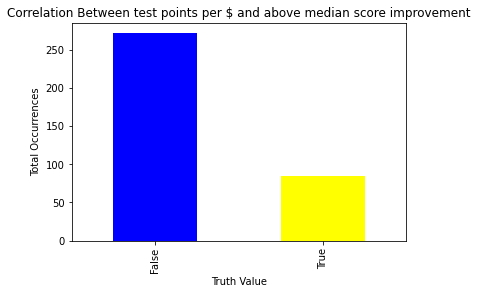

In [12]:
true_count = df['8_per_dollar_>_&_above_8_median'].value_counts()

true_count.plot(kind='bar', color=["blue", "yellow"])

mp.xlabel('Truth Value')
mp.ylabel('Total Occurrences')
mp.title('Correlation Between test points per $ and above median score improvement')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, 'AVG 8th Math Score')

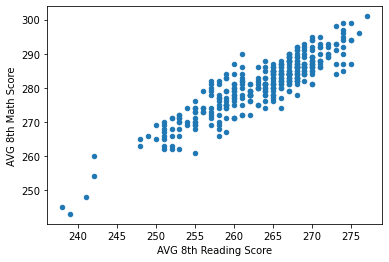

In [120]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=1)
mp.xlabel('AVG 8th Reading Score')
mp.ylabel('AVG 8th Math Score')

**<CAPTION FOR VIZ 2>**

Text(0, 0.5, 'AVG 8th Math Score')

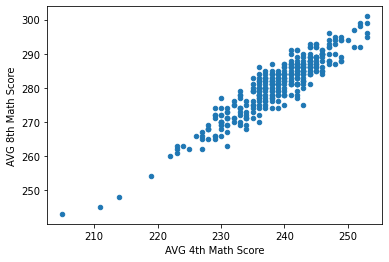

In [14]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=1)
mp.xlabel('AVG 4th Math Score')
mp.ylabel('AVG 8th Math Score')

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [15]:
from sklearn.model_selection import train_test_split

In [33]:
X =  df[['AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# create your model here
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [39]:
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.9221444902698532
0.5772781306319777
1.7736693695710786
2.2435228432693655


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

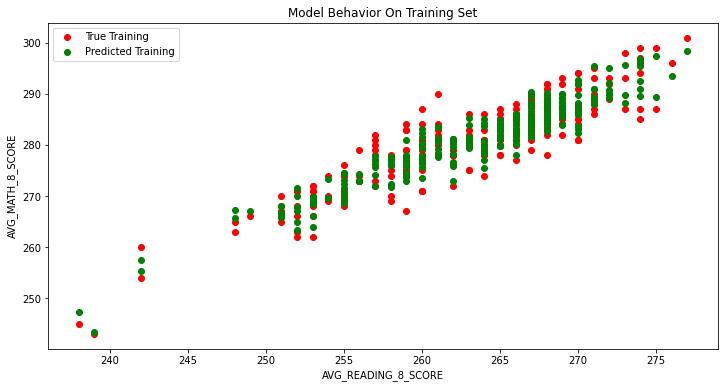

In [40]:
col_name = 'AVG_READING_8_SCORE'

f = mp.figure(figsize=(12,6))
mp.scatter(X_train['AVG_READING_8_SCORE'], y_train, color = "red")
mp.scatter(X_train['AVG_READING_8_SCORE'], model.predict(X_train), color = "green")

mp.legend(['True Training','Predicted Training'])
mp.xlabel('AVG_READING_8_SCORE')
mp.ylabel('AVG_MATH_8_SCORE')
mp.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

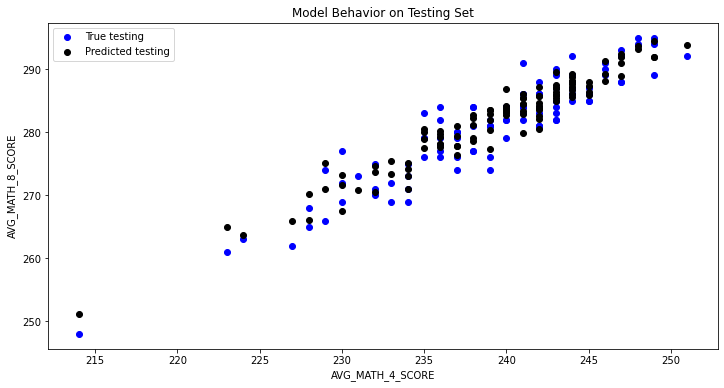

In [42]:
col_name = 'AVG_MATH_4_SCORE'

f = mp.figure(figsize=(12,6))
mp.scatter(X_test['AVG_MATH_4_SCORE'], y_test, color = "blue")
mp.scatter(X_test['AVG_MATH_4_SCORE'], model.predict(X_test), color = "black")

mp.legend(['True testing','Predicted testing'])
mp.xlabel('AVG_MATH_4_SCORE')
mp.ylabel('AVG_MATH_8_SCORE')
mp.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>

For the first graph I wanted to see if there was a correlation between the "efficiency" of expenditures to an above average improvement rate in math scores from 4th to 8th. Essentially, I divided the 8th math scores by expenditure related to education to create an efficieny metric, and checked if states often had both high efficiency and improvement rate. I believe I could refine this looking into the actual dispersment of truth values, e.g. how many false/false vs. false/true vs. true/false to get a better picture of the data, but I do not have the time to refine this my analysis of this relationship.

For the second/third visual I just did a simple comparison of 8th reading andavg 4th math scores, to avg math 8 scores, to see if high scores in one correlated with high scores in another. I found that if you have a high average 8th reading average and/or a high math 4th average, then you are likely to have a high 8th math average. The model seems to be pretty accurate, but appears to undershoot the extremes, possibly due to sample size. While the predictors and response variables are elementary, there are less obvious insights. Since there is a correlation between reading and math scores we can make some inferences, like the fact that schools generally don't speciallize in an area, if they did then we'd find many instances where schools will have one high score and the other will be mediocre. There are other insights and theories we could craft, but I will leave those for later. 
**